GRU based - Stock predicition

In [139]:
import math
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt
import yfinance as yf

In [140]:
ticker = 'AMZN'  #amazon  start=   end = current date

In [141]:
#Get stock quote - we import just the opening and closing Prices of stock, over 20 years duration

#df=web.DataReader('AAPL', 'yahoo', start='2015-01-01', end='2020-05-24')    #YYYY-MM-DD
yf.pdr_override()
df=pdr.get_data_yahoo('AAPL', start='2015-01-01', end='2022-12-30')
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   27.847500   27.860001   26.837500   27.332500   24.531761   
2015-01-05   27.072500   27.162500   26.352501   26.562500   23.840662   
2015-01-06   26.635000   26.857500   26.157499   26.565001   23.842909   
2015-01-07   26.799999   27.049999   26.674999   26.937500   24.177244   
2015-01-08   27.307501   28.037500   27.174999   27.972500   25.106186   
...                ...         ...         ...         ...         ...   
2022-12-22  134.350006  134.559998  130.300003  132.229996  131.846039   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674026   
2022-12-29  127.989998  130.479996  127.730

In [142]:
df.shape

(2013, 6)

In [143]:
plt.style.use('seaborn')

<ipython-input-143-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


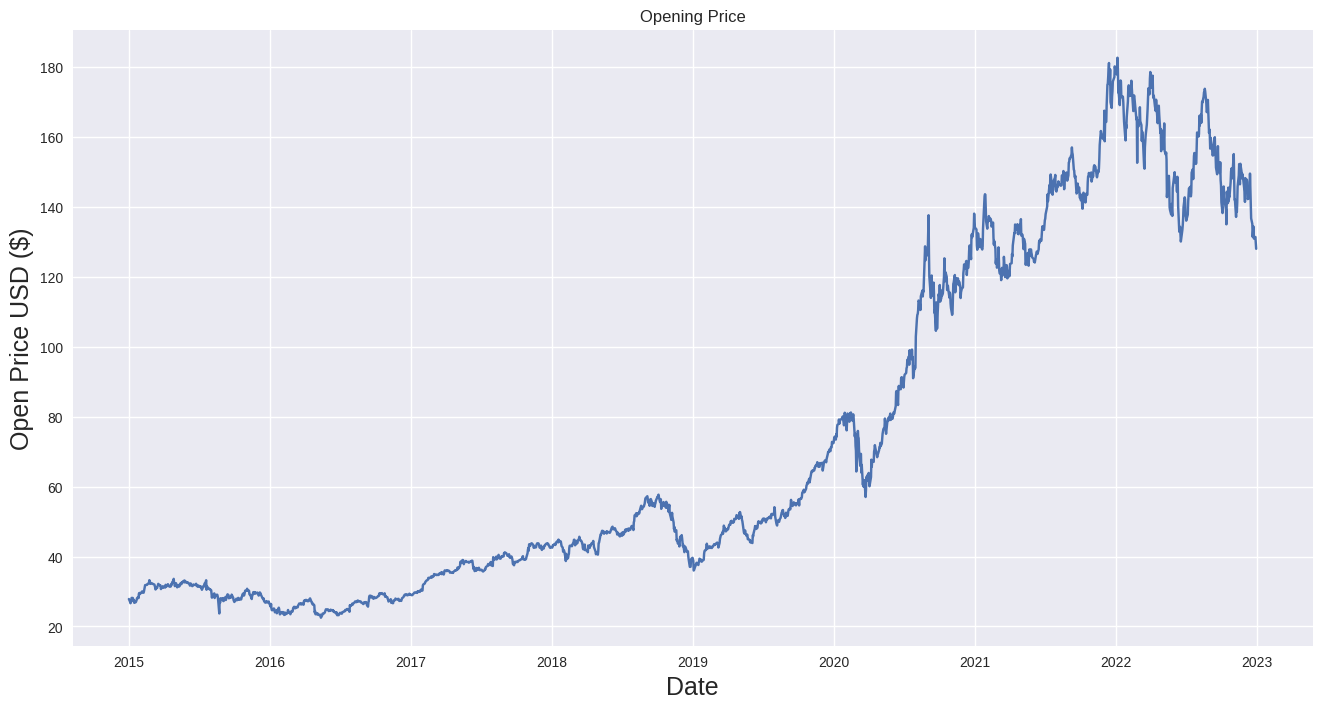

In [144]:
plt.figure(figsize=(16,8))
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [145]:
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1611

In [146]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [147]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.03339474, 0.02855492, 0.02582277, 0.02685318, 0.03002249,
       0.03539311, 0.03528383, 0.03345719, 0.02972585, 0.03122463,
       0.02658777, 0.02785236, 0.02958533, 0.03163055, 0.03481547,
       0.03706363, 0.03500281, 0.04313682, 0.04109161, 0.04433898,
       0.04379255, 0.0444951 , 0.0444951 , 0.04686816, 0.04686816,
       0.04457316, 0.04710235, 0.05116155, 0.056298  , 0.05820271,
       0.05853056, 0.05874914, 0.06007618, 0.06029475, 0.06248049,
       0.06703928, 0.06488478, 0.06056016, 0.06244926, 0.06127833,
       0.06082559, 0.06104416, 0.06023231, 0.05995128, 0.05926434,
       0.05684444, 0.05425279, 0.05044338, 0.05370636, 0.05289452,
       0.05604821, 0.05776556, 0.06049772, 0.0597171 , 0.05795292,
       0.05812465, 0.0570474 , 0.05114595, 0.05397177, 0.05315994])]
[0.05634483737807644]



In [148]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [149]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1551, 60, 1)

In [150]:
#Build model
model=Sequential()
#Add first layer to model
model.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(GRU(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [151]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [152]:
hist = model.fit(x_train, y_train, batch_size=100,epochs=100)

Epoch 1/100
16/16 [==============================] - 12s 92ms/step - loss: 0.0157 - accuracy: 6.4475e-04
Epoch 2/100
16/16 [==============================] - 1s 90ms/step - loss: 0.0014 - accuracy: 6.4475e-04
Epoch 3/100
16/16 [==============================] - 1s 91ms/step - loss: 4.0884e-04 - accuracy: 6.4475e-04
Epoch 4/100
16/16 [==============================] - 2s 108ms/step - loss: 1.8911e-04 - accuracy: 6.4475e-04
Epoch 5/100
16/16 [==============================] - 3s 160ms/step - loss: 1.4061e-04 - accuracy: 6.4475e-04
Epoch 6/100
16/16 [==============================] - 1s 90ms/step - loss: 1.3444e-04 - accuracy: 6.4475e-04
Epoch 7/100
16/16 [==============================] - 1s 86ms/step - loss: 1.3750e-04 - accuracy: 6.4475e-04
Epoch 8/100
16/16 [==============================] - 1s 84ms/step - loss: 1.3006e-04 - accuracy: 6.4475e-04
Epoch 9/100
16/16 [==============================] - 1s 93ms/step - loss: 1.2752e-04 - accuracy: 6.4475e-04
Epoch 10/100
16/16 [=============

Testomg amd Validating model

In [153]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test
print(len(test_data))
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

462


In [154]:
x_test=np.array(x_test)

In [155]:
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [156]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 16ms/step


In [157]:
from sklearn.metrics import mean_absolute_error

#Get root mean squared error(RMSE)
rmse =np.sqrt(np.mean(predictions-y_test)**2)

print(rmse, mean_absolute_error(y_test,predictions))

0.04048291486294115 2.30785443889561


In [ ]:
def MAPE(Original, Expectation):
  n = float(0)
  for i in range(0, len(Original)):
    n += abs((Original[i]- Expectation[i])/ (Original[i])) * 100
  n /= len(Original)
  return n
print(MAPE(y_test, predictions))

[1.54680443]


In [ ]:
plt.style.use('seaborn')

<ipython-input-58-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('APPLE - GRU (epoch:100)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
#plt.savefig('/content/prediction.png')
plt.show()

In [ ]:
valid.head(15)

,Open,predictions
Date,,
2021-05-27,126.440002,126.510994
2021-05-28,125.570000,126.261337
2021-06-01,125.080002,125.700668
2021-06-02,124.279999,125.133919
2021-06-03,124.680000,124.465256
2021-06-04,124.070000,124.250916
2021-06-07,126.169998,123.919472
2021-06-08,126.599998,124.634232
2021-06-09,127.209999,125.348579


Getting predictions

In [ ]:
#Get the quote
stock_quote = pdr.get_data_yahoo('AAPL', start='2015-01-01', end='2022-12-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 23ms/step
Opening Price of AMZN tomorrow:[[128.46701]]
